# Skew-T図

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import io
import pandas as pd
def get_sounding(yyyy, mm, dd, hh, stnm):
    url = "http://weather.uwyo.edu/cgi-bin/sounding?TYPE=TEXT%3ALIST&YEAR={0}&MONTH={1:0=2}&FROM={2:0=2}{3:0=2}&TO={2:0=2}{3:0=2}&STNM={4}"
    response = urlopen(url.format(yyyy,mm,dd,hh,stnm))
    html = response.read().decode("utf8")
    soup = BeautifulSoup(html, "html.parser")
    s = soup.pre.string
    f = io.StringIO(s)
    col_names = ['pressure', 'height', 'temperature', 'dewpoint', 'direction', 'speed']
    df = pd.read_fwf(f, skiprows=5, skipfooter=1,
                      usecols=[0, 1, 2, 3, 6, 7], names=col_names)
    return df

In [2]:
df = get_sounding(2018, 8, 3, 0, 47778)

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import numpy as np
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import Hodograph, SkewT
from metpy.units import units
df['u_wind'], df['v_wind'] = mpcalc.wind_components(df['speed'], np.deg2rad(df['direction']))
df = df.dropna(subset=('temperature', 'dewpoint', 'direction', 'speed',
                       'u_wind', 'v_wind'), how='all').reset_index(drop=True)
p = df['pressure'].values * units.hPa
T = df['temperature'].values * units.degC
Td = df['dewpoint'].values * units.degC
wind_speed = df['speed'].values * units.knots
wind_dir = df['direction'].values * units.degrees
u, v = mpcalc.wind_components(wind_speed, wind_dir)
lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])
parcel_prof = mpcalc.parcel_profile(p, T[0], Td[0]).to('degC')

## 完成品

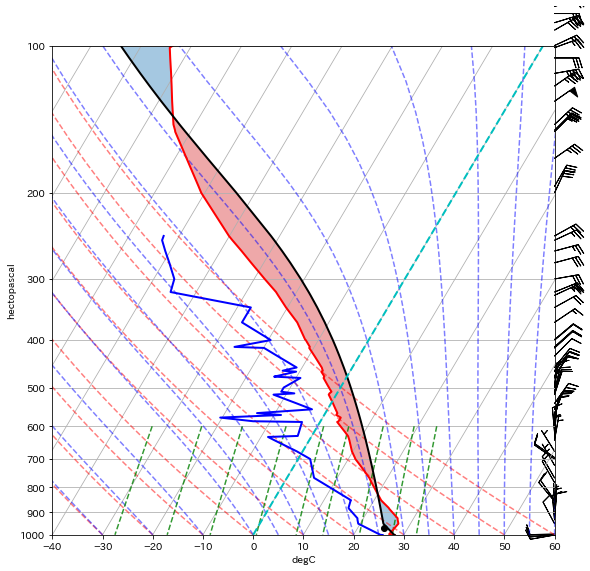

In [4]:
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig)
skew.plot(p, T, 'r', linewidth=2)
skew.plot(p, Td, 'b', linewidth=2)
skew.plot_barbs(p, u, v)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')
skew.plot(p, parcel_prof, 'k', linewidth=2)
skew.shade_cin(p, T, parcel_prof)
skew.shade_cape(p, T, parcel_prof)
skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

## 気圧と気温
気圧は対数，気温は傾斜

(-40, 60)

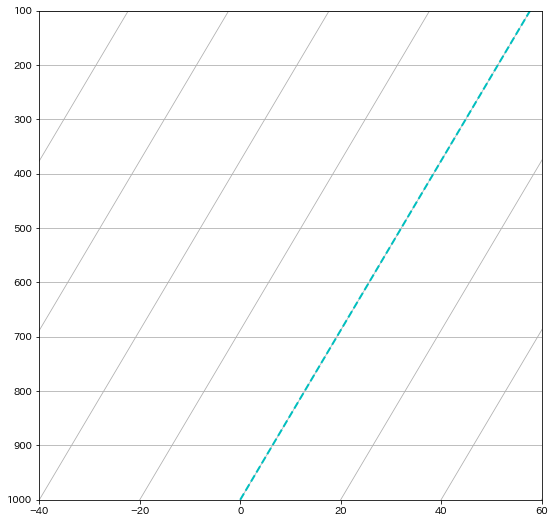

In [20]:
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig)
skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)

## 等混合比線

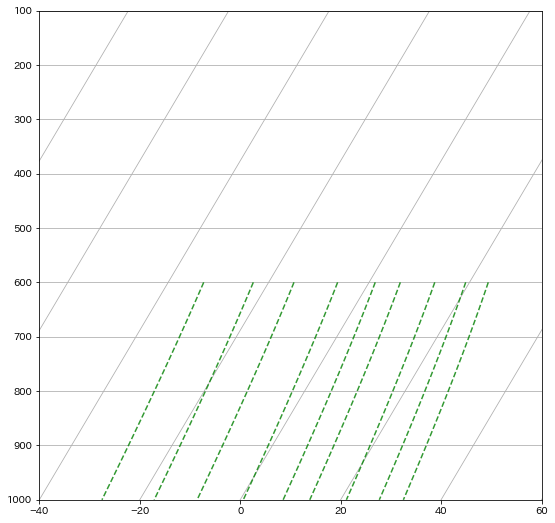

In [21]:
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)
skew.plot_mixing_lines()

## 高層気象観測データ
Skew-T図は高層気象観測データの描画に使われる。赤: 気温T，青: 露点温度Td (dew-point temperature)，黒: 持ち上げ凝結高度 (LCL, Lifting Condensation Level)，矢羽: 風向風速

(-40, 60)

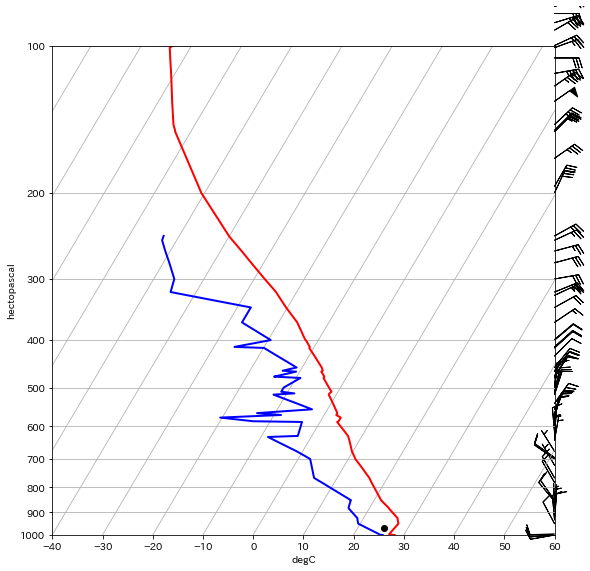

In [9]:
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig)
skew.plot(p, T, 'r', linewidth=2)
skew.plot(p, Td, 'b', linewidth=2)
skew.plot_barbs(p, u, v)
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)

 # 気塊の上昇曲線
 気塊は凝結するまで（持ち上げ凝結高度まで）乾燥空気としてふるまうので，乾燥断熱線に沿って上昇する。
 黒: 地表付近（1000 hPa）の気塊の鉛直分布。赤: 乾燥断熱減率（$g/C_p\approx10$K/km)

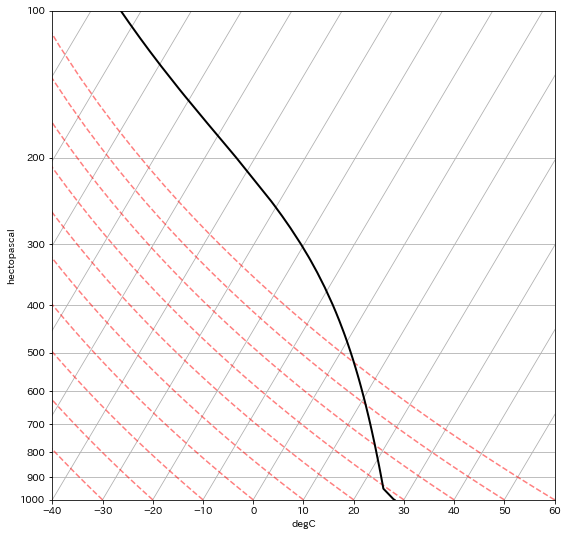

In [22]:
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)
skew.plot(p, parcel_prof, 'k', linewidth=2)
skew.plot_dry_adiabats()

持ち上げ凝結高度から上では，湿潤断熱減率に従う。青: 湿潤断熱減率

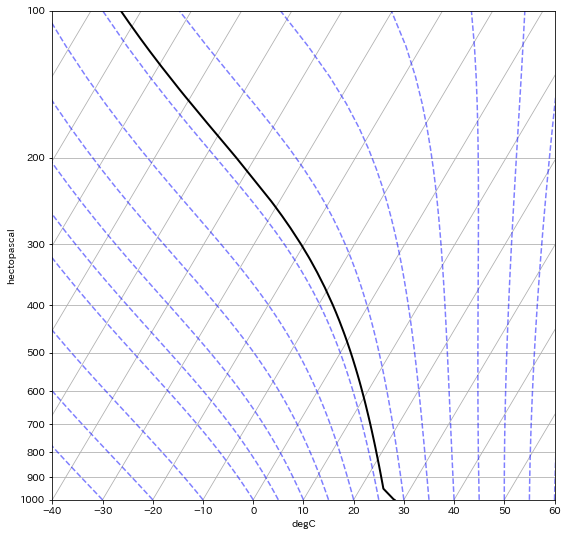

In [14]:
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)
skew.plot(p, parcel_prof, 'k', linewidth=2)
skew.plot_moist_adiabats()

# CAPEとCIN
環境場よりも気塊の対流の
赤: CAPE (Convective Available Potential Energy), CIN (Convective Inhibition)

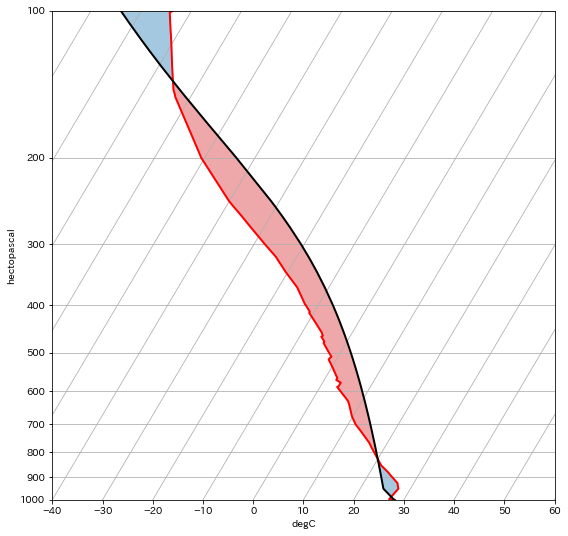

In [23]:
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig)
skew.plot(p, T, 'r', linewidth=2)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)
skew.plot(p, parcel_prof, 'k', linewidth=2)
skew.shade_cin(p, T, parcel_prof)
skew.shade_cape(p, T, parcel_prof)